In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS
from os import path

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)



In [2]:

# url='https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv'
# df=pd.read_csv('https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv')
# df.head()

In [3]:
# df.to_csv(path.join('..','datasets','songs.csv'))


In [4]:
df=pd.read_csv(path.join('..','datasets','songs.csv'))
df.drop(['Unnamed: 0'],inplace = True, axis = 1)
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


# Wordclouds


(-0.5, 399.5, 199.5, -0.5)

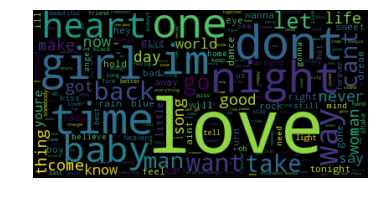

In [5]:
# Generate a word cloud image from Song Names
wordcloud = WordCloud().generate(' '.join(df['Song']))
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [6]:
# store to file
wordcloud.to_file(path.join('..', 'assets', 'songs_cloud.png'))


(-0.5, 399.5, 199.5, -0.5)

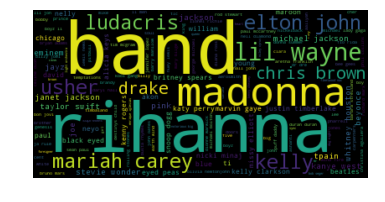

In [7]:
stopwords = set(STOPWORDS)
stopwords.add("featuring")

# generate word cloud
wordcloud2 = WordCloud(stopwords=stopwords)
wordcloud2.generate(' '.join(df['Artist']))


# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

In [8]:
wordcloud2.to_file(path.join('..', 'assets', 'artists_cloud.png'))

# Most Frequently in Billboard 100 List


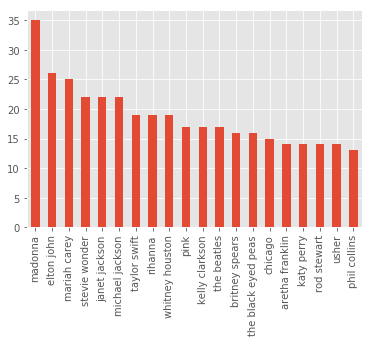

In [9]:
fig, ax = plt.subplots()
df['Artist'].value_counts()[:20].plot(ax=ax, kind='bar')
fig.savefig(path.join('..', 'assets', 'most_artists.png'))


# Average Hits Per Year vs Career Lifespan

In [27]:

grouped_df = df.groupby( [ "Artist"] ).size().reset_index(name = "Song_Count")
grouped_df['First_Year'] = 0
grouped_df['Last_Year'] = 0
grouped_df

,Artist,Song_Count,First_Year,Last_Year
0,the mysterians,1,0,0
1,100 proof aged in soul,1,0,0
2,10000 maniacs,1,0,0
3,10cc,2,0,0
4,112,3,0,0
5,112 featuring foxy brown,1,0,0
6,112 featuring lil zane,1,0,0
7,112 featuring the notorious big and mase,1,0,0
8,1910 fruitgum company,3,0,0
9,2 chainz,1,0,0


In [28]:
for i in range(0, len(grouped_df)):
    name = grouped_df.Artist[i]
    rows = df[(df.Artist == name)]
    grouped_df['First_Year'][i] = rows.Year.min()
    grouped_df['Last_Year'][i] = rows.Year.max()
#     first = rows.Year.min()
#     last = rows.Year.max()
# print first, last


/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/manulohiya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
grouped_df['Career_Span'] = grouped_df['Last_Year'] - grouped_df['First_Year']+1
grouped_df


,Artist,Song_Count,First_Year,Last_Year,Career_Span
0,the mysterians,1,1966,1966,1
1,100 proof aged in soul,1,1970,1970,1
2,10000 maniacs,1,1994,1994,1
3,10cc,2,1975,1977,3
4,112,3,1997,2001,5
5,112 featuring foxy brown,1,2005,2005,1
6,112 featuring lil zane,1,1999,1999,1
7,112 featuring the notorious big and mase,1,1996,1996,1
8,1910 fruitgum company,3,1968,1969,2
9,2 chainz,1,2013,2013,1


In [33]:
grouped_df['Avg_Songs_Per_Year'] = grouped_df['Song_Count']/grouped_df['Career_Span']
grouped_df_min5 = grouped_df[(grouped_df.Song_Count > 4)]
grouped_df_min5.head()


,Artist,Song_Count,First_Year,Last_Year,Career_Span,Avg_Songs_Per_Year
16,3 doors down,8,2000,2008,9,0.888889
25,50 cent,5,2003,2005,3,1.666667
34,98 degrees,6,1997,2000,4,1.500000
38,aaliyah,11,1994,2003,10,1.100000
41,abba,6,1974,1981,8,0.750000


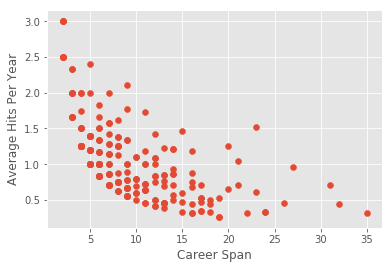

In [40]:
y = grouped_df_min5.Avg_Songs_Per_Year
x = grouped_df_min5.Career_Span
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Career Span')
ax.set_ylabel('Average Hits Per Year')

plt.scatter(x,y)
plt.show()